## Import Data

In [3]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

In [4]:
data_frames = []

for file in glob.glob("*.json"):
    with open(file) as json_file:
        data = json.load (json_file)
        df = pdjson.json_normalize(data).head(50)
        df['variant'] = file.replace(".json","")
        data_frames.append(df)

df = pd.concat (data_frames)
df.count()

name                               100
command                            100
time_secs                          100
user_time_secs                     100
sys_time_secs                      100
maxrss_kB                          100
ocaml_url                          100
ocaml.version                      100
ocaml.c_compiler                   100
ocaml.architecture                 100
ocaml.word_size                    100
ocaml.system                       100
ocaml.function_sections            100
ocaml.supports_shared_libraries    100
gc.allocated_words                 100
gc.minor_words                     100
gc.promoted_words                  100
gc.major_words                     100
gc.minor_collections               100
gc.major_collections               100
gc.heap_words                      100
gc.heap_chunks                     100
gc.top_heap_words                  100
gc.compactions                     100
variant                            100
dtype: int64

In [21]:
df.head()

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,ocaml_url,ocaml.version,ocaml.c_compiler,ocaml.architecture,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant
0,kb-no-exc,kb_no_exc.exe,0.440590,0.432102,0.008001,9724,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,37350877,4700593,4700593,157,43,430080,7,656896,5,4.10.0+closurerec
1,kb,kb.exe,0.658400,0.653930,0.004011,8808,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,90424875,4906420,4906420,369,62,430080,7,565248,6,4.10.0+closurerec
2,lexifi-g2pp,main.exe,14.258371,14.253614,0.003999,7308,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,1645745188,180309,180309,6280,7,163328,2,593408,2,4.10.0+closurerec
3,chameneos-lwt,chameneos_redux_lwt.exe 600000,1.105148,1.100622,0.004002,6236,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,540723946,820595,820595,2240,356,73728,1,565248,2,4.10.0+closurerec
4,sauvola,contrast.exe example2_small.ppm example2,12.261024,8.675043,3.585065,8152,https://github.com/kayceesrk/ocaml/archive/clo...,4.10.0+dev0-2019-04-23,gcc,amd64,...,2722433042,3577158,49547925,11008,1253,164352,2,594432,2,4.10.0+closurerec


## Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [132]:
df.loc[(df['variant'] == '4.10.0+trunk') & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,ocaml_url,ocaml.version,ocaml.c_compiler,ocaml.architecture,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant
2,lexifi-g2pp,main.exe,14.142385,14.129493,0.012001,7236,https://github.com/ocaml/ocaml/archive/trunk.t...,4.10.0+dev0-2019-04-23,gcc,amd64,...,1645745187,180359,180359,6280,7,163328,2,593408,2,4.10.0+trunk
4,sauvola,contrast.exe example2_small.ppm example2,12.102919,8.429331,3.672580,8056,https://github.com/ocaml/ocaml/archive/trunk.t...,4.10.0+dev0-2019-04-23,gcc,amd64,...,2722433034,3578258,49549025,11013,1261,164352,2,594432,2,4.10.0+trunk
11,valet-lwt,test_lwt.exe 200,21.178358,21.169549,0.007999,10336,https://github.com/ocaml/ocaml/archive/trunk.t...,4.10.0+dev0-2019-04-23,gcc,amd64,...,1127637487,11316519,27765659,4521,439,240128,3,608768,2,4.10.0+trunk


## Projection example

```
select name, variant, time_secs from df
```

In [135]:
df.filter(['name','variant','time_secs'])

,name,variant,time_secs
0,kb-no-exc,4.10.0+closurerec,0.440590
1,kb,4.10.0+closurerec,0.658400
2,lexifi-g2pp,4.10.0+closurerec,14.258371
3,chameneos-lwt,4.10.0+closurerec,1.105148
4,sauvola,4.10.0+closurerec,12.261024
...,...,...,...
45,pervasives_bench.pervasives_equal_strings.2000...,4.10.0+trunk,2.318377
46,big_array_bench.big_array_int32_rev.1024.50000,4.10.0+trunk,1.541707
47,hashtbl_bench.hashtbl_iter.200000,4.10.0+trunk,2.430197
48,str_bench.str_search_forward.1000000,4.10.0+trunk,0.278141


## Time

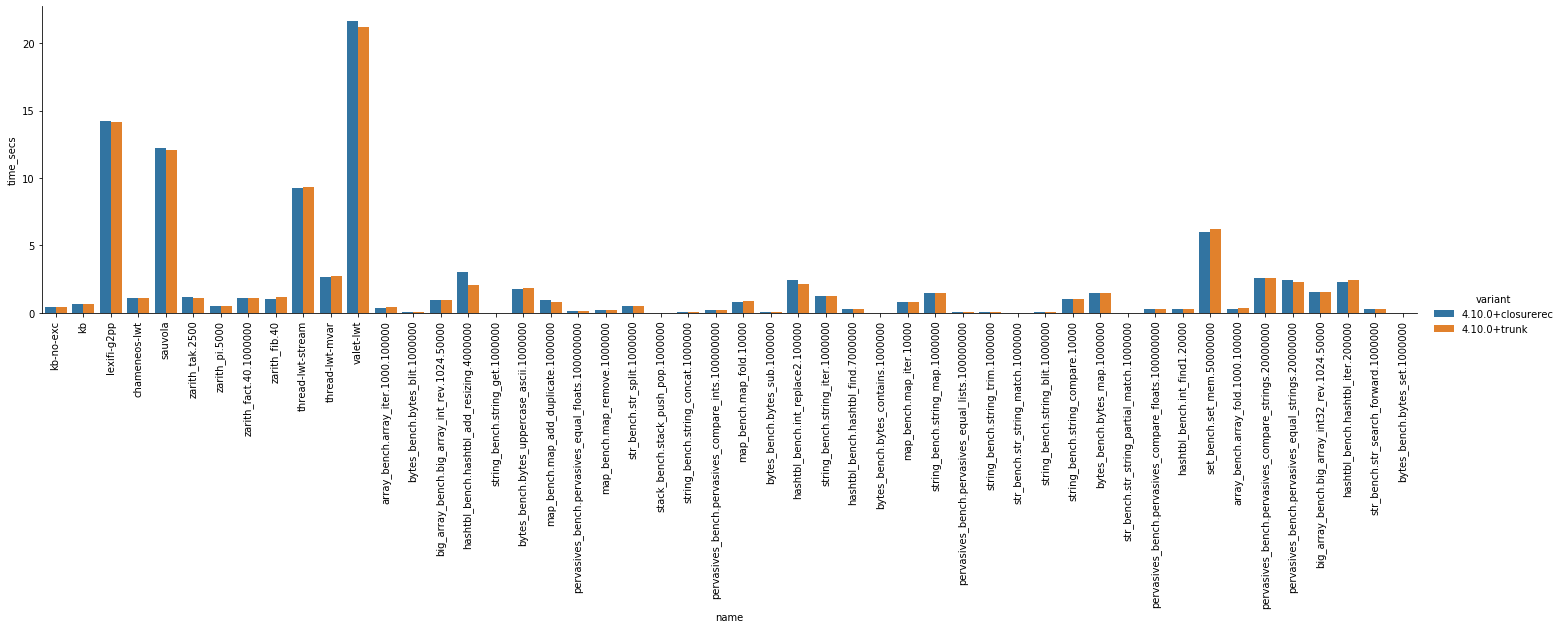

In [139]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [136]:
def normalise(df,variant,topic):
    grouped = df.filter(items=['name',topic,'variant']).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            ndata_frames.append(data)
    return pd.concat (ndata_frames)

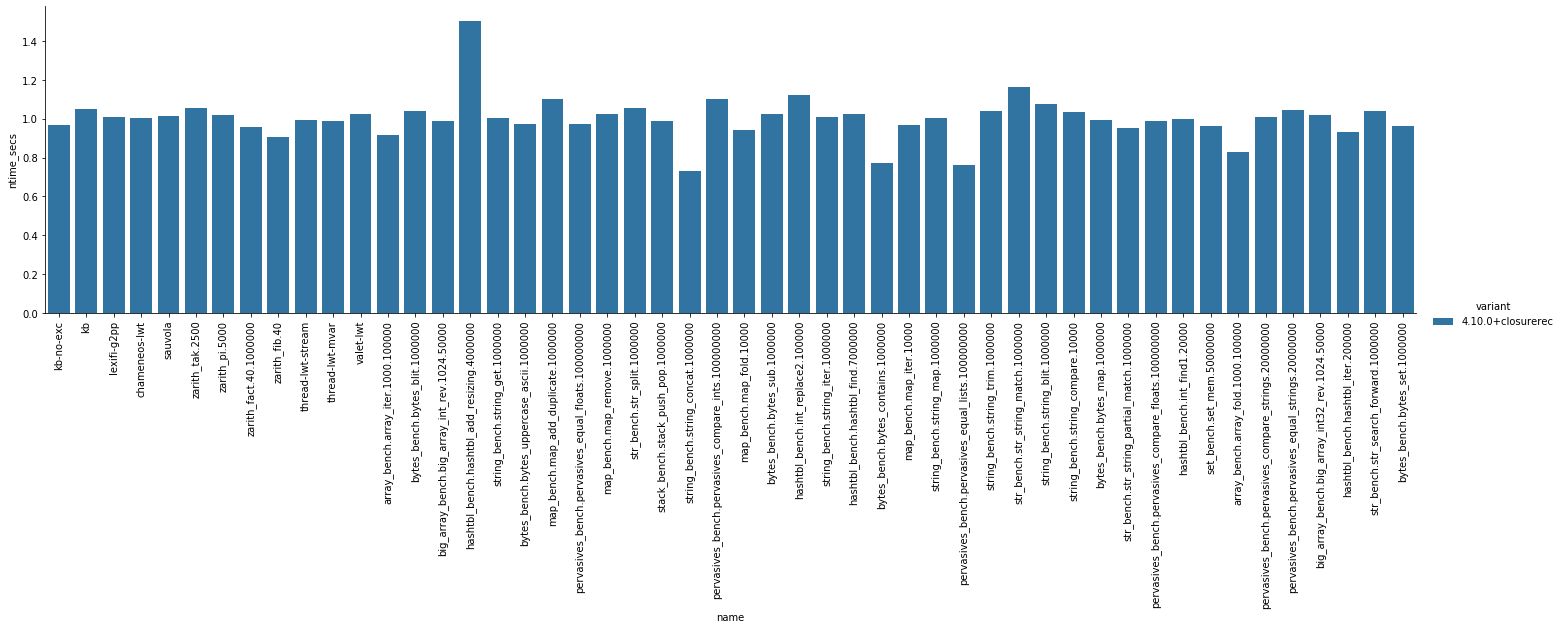

In [137]:
ndf = normalise(df,'4.10.0+trunk','time_secs')
g = sns.catplot (x='name', y='ntime_secs', hue='variant', data = ndf, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

## Major words

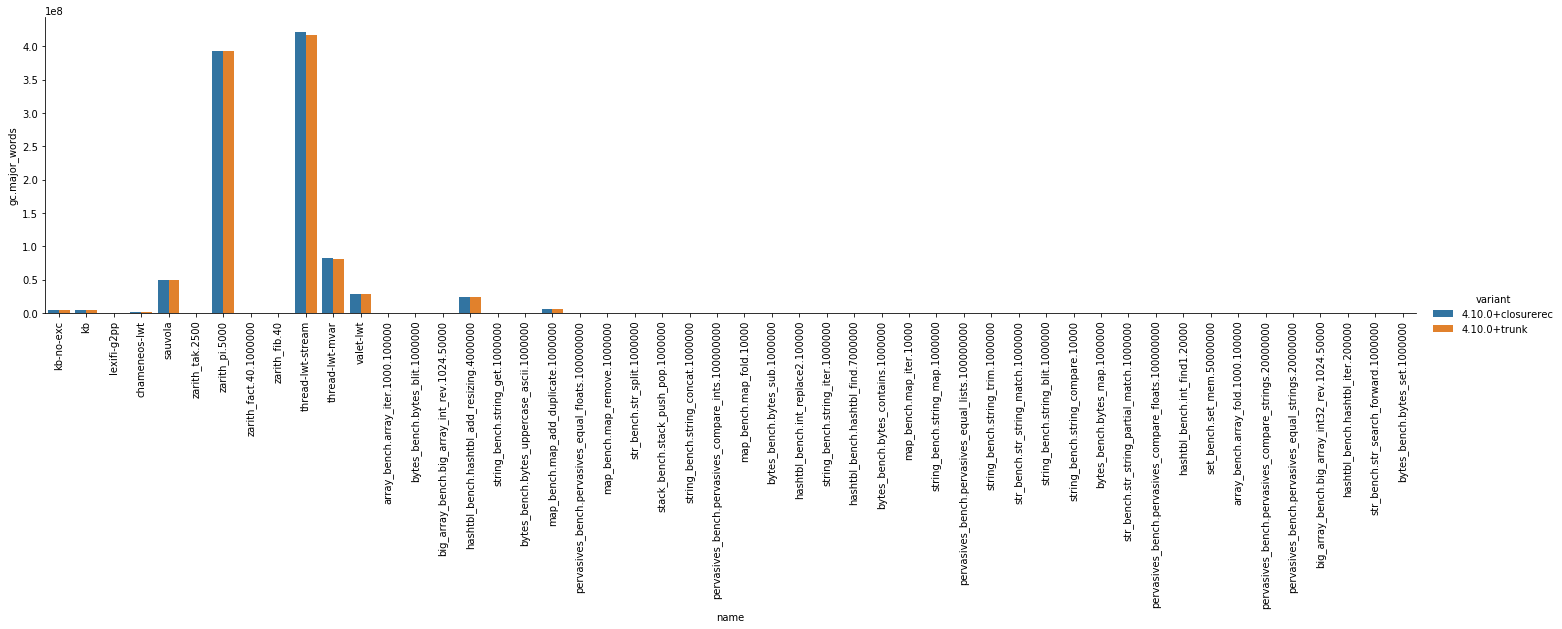

In [138]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

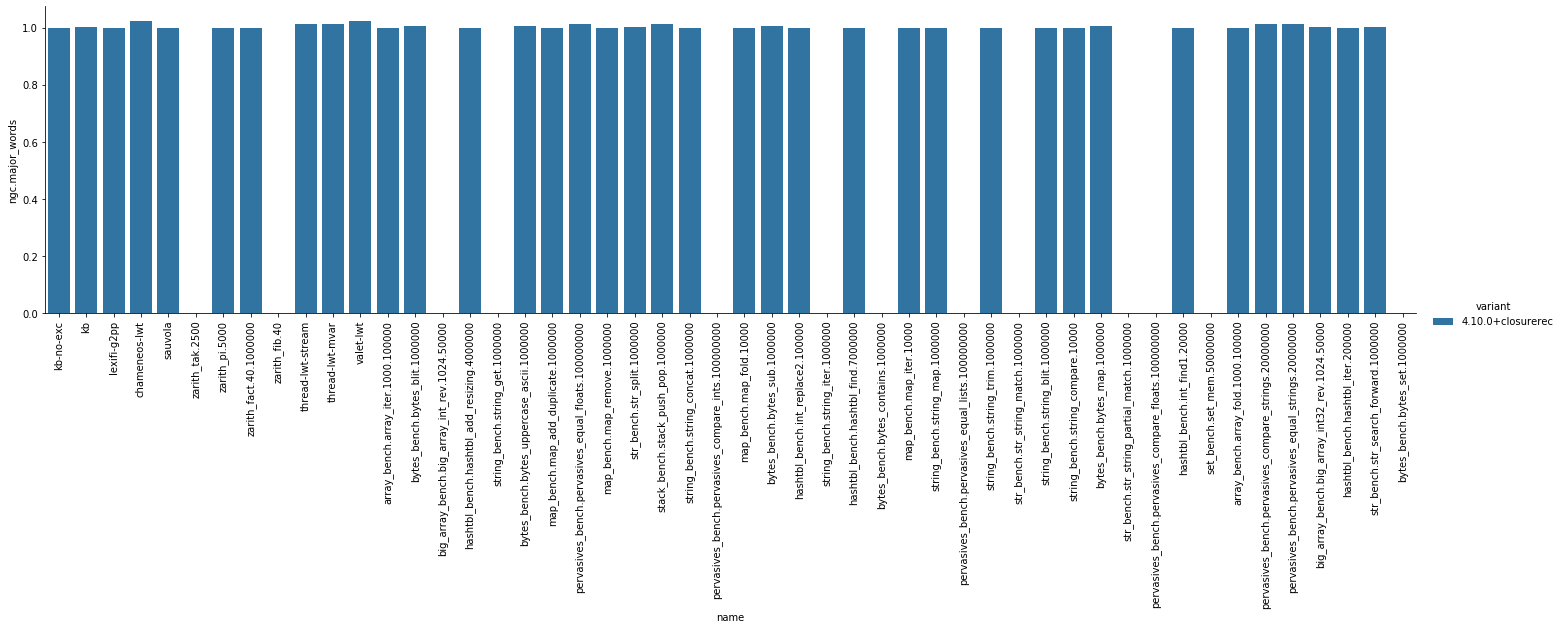

In [112]:
ndf = normalise(df,'4.10.0+trunk','gc.major_words')
g = sns.catplot (x='name', y='ngc.major_words', hue='variant', data = ndf, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)